# Parte 1: Declarar nuestra función para obtener los datos 

En programación es usual "reciclar código" utilizando funciones o clases que nos permitan repetir cálculos, procesos o acciones sin la necesidad de volver a escribir el código

## get_prices()
Crearemos la función get_prices() para obtener los precios de los activos financieros haciendo uso de la API yfinance

In [27]:
import pandas as pd
import numpy as np
import yfinance as yf


def get_prices(symbols,start,end, intervals):
    """
    Función que retorna un array con el precio ajustado para cada símbolo

    Parámetros:
        symbols: list=['AAPL','TSLA']
        start: str='YYYY-MM-DD'
        end: str='YYYY-MM-DD'
        intervals: str
            valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    Ejemplo: 

    prices = get_prices(['AAPL','TSLA'],start='2021-01-01',end='2022-01-01',frequency='M')

    """
    _data = yf.download(symbols,start=start,end=end,progress=False)
    _prices = _data['Adj Close']
    
    return _prices

In [65]:
## Ejemplo
prices = get_prices(['AAPL','TSLA'],start='2021-01-01',end='2022-01-01',
                    intervals='1D')
prices

,AAPL,TSLA
Date,,
2021-01-04,128.264999,729.770020
2021-01-05,129.850830,735.109985
2021-01-06,125.479851,755.979980
2021-01-07,129.761627,816.039978
2021-01-08,130.881607,880.020020
...,...,...
2021-12-27,179.836319,1093.939941
2021-12-28,178.799149,1088.469971
2021-12-29,178.888916,1086.189941


## Graficar los precios

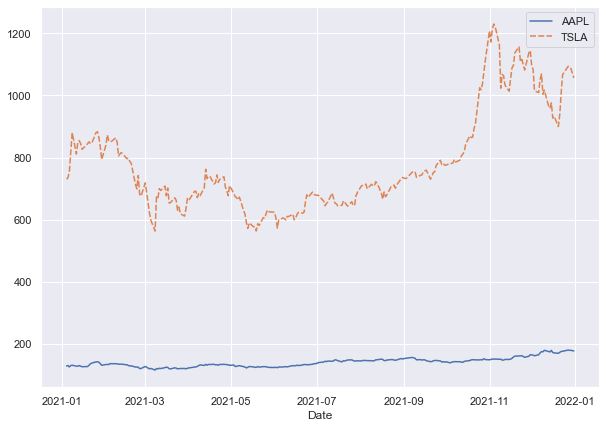

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

fig = plt.figure(figsize=(10,7))

sns.lineplot(data=prices)
plt.show()


## Normalizar los precios para graficarlos

Es usual que en un portafolio tengamos diferentes activos con precios muy altos o muy bajos, esto nos impide ver una correcta visualización si quisieramos graficarlos juntos. En este caso, solo para efectos de la visualización es útil normalizar los datos

\begin{align}
    X_{normalized} = \frac{X-X_{min}}{X_{max}-X_{min}}
\end{align}

### Normalizar una columna 

In [68]:
## yo puedo normalizar apple
apple = prices['AAPL']

# Opción 1: funciones nativas de python
apple_norm = (apple - min(apple))/(max(apple)-min(apple))

# Opción 2: métodos de Pandas (ya que prices es un dataframe y apple es una Serie)
apple_norm = (apple-apple.min())/(apple.max()-apple.min())

# Opción 3: con el método agg y funciones de numpy
apple_norm = (apple-apple.agg(np.min))/(apple.agg(np.max)-apple.agg(np.min))

In [69]:
### Ejercicio normalize cada columna del dataframe y luego grafiquelas juntas
# Normalize los precios y grafiquelos


# prices_norm = 


## get_returns()

Siguiendo la lógica usada en get_prices() cree una función tal que para CADA COLUMNA calcule el retorno continuo o logarítmico dado por la ecuación

\begin{align}
    r_{i} = ln(\frac{P_{t,i}}{P_{t-1,i}})
\end{align}

donde $i = {'AAPL','TSLA'}$ y $t$ es el tiempo

In [73]:
### Ejemplo

ret_apple = np.log(prices['AAPL']/(prices['AAPL'].shift(1)))
ret_apple

Date
2021-01-04         NaN
2021-01-05    0.012288
2021-01-06   -0.034241
2021-01-07    0.033554
2021-01-08    0.008594
                ...   
2021-12-27    0.022715
2021-12-28   -0.005784
2021-12-29    0.000502
2021-12-30   -0.006600
2021-12-31   -0.003542
Name: AAPL, Length: 252, dtype: float64

In [ ]:
# def get_returns():


# returns = get_returns()

## Grafiquemos los precios y los retornos y sus histogramas con sus funciones de densidad de probabilidad estimadas

In [74]:
get_returns = lambda x,y: np.log(x/y)
returns = get_returns(prices,prices.shift(1)) 

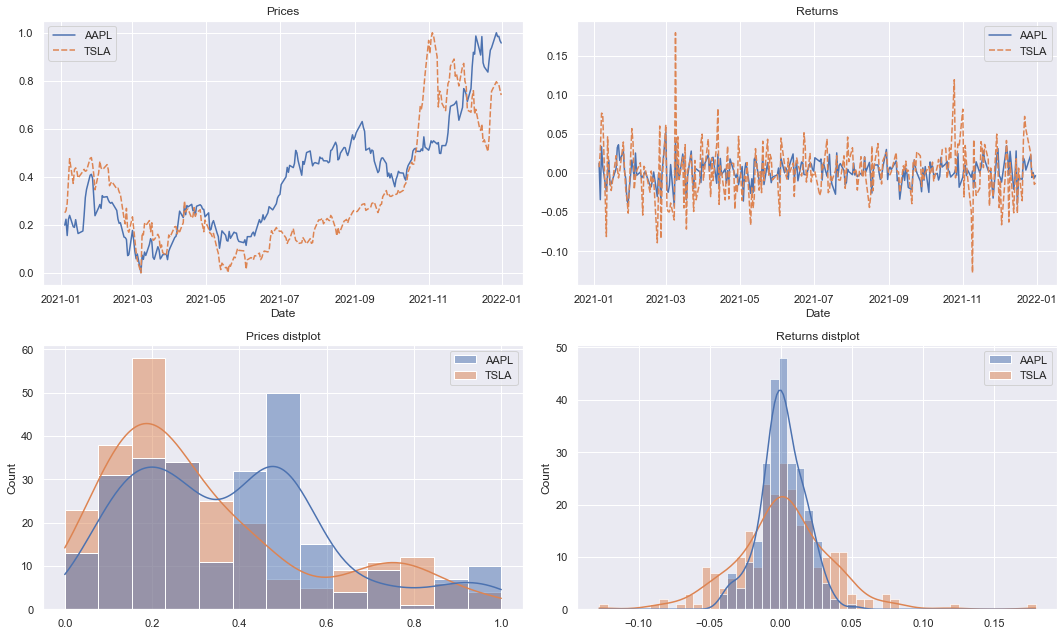

In [85]:
prices_norm = (prices-prices.min())/(prices.max()-prices.min())

fig, axes = plt.subplots(2,2, figsize = (15,9))
sns.lineplot(ax=axes[0,0],data=prices_norm)
axes[0,0].set_title("Prices")

sns.histplot(ax=axes[1,0],data=prices_norm,kde=True)
axes[1,0].set_title('Prices distplot')

sns.lineplot(ax=axes[0,1],data=returns)
axes[0,1].set_title("Returns")

sns.histplot(ax=axes[1,1],data=returns,kde=True)
axes[1,1].set_title('Returns distplot')

fig.tight_layout()
plt.show()

## La importancia de los retornos como variable de interés

La importancia de los retornos como variable de interés tiene diversas explicaciónes: 

+ La más empírica sugiere que nosotros, como inversionistas, más que el propio precio de un activo financiero nos interesa conocer o estimar su rendimiento, por ejemplo:

No me interesa tanto saber si apple esta a 100 o a 150, lo que me interesa saber es que tanto voy a ganar (o perder) en apple si invierto 100 millones

+ Otra explicación, un poco más formal, recae en que yo puedo generar supuestos más fácilmente en variables aleatorias cuya distribución es o se asemeja a la normal, ya que el estimador de mi media muestral será igual o estadísticamente similar a la media poblacional, además de tener una varianza constante.

+ Desde la perspectiva de la econometría de series de tiempo, hay otro hecho relvante al momento de trabajar con los retornos ya que estos son, en su mayoría, estacionarios, eliminado el problema de raíz unitaria.

<div>
<img src="./img/coincidencia.png" width="500"/>
</div>

***
***

# Parte 2: Operaciones con vectores y matrices

In [2]:
import pandas as pd
import numpy as np

Suponga que los precios de cierre ajustado histórico de tres días para Apple y Tesla fueron: {100, 150, 125}, {50, 65, 68}, respectivamente. Ahora queremos "representar matricialmente" este conjunto de precios, y "calcular" su retorno contínuo por ende podríamos hacer: 

\begin{equation*}
\mathbb{P} = \left[
\begin{matrix}
100 & 50 \\
150 & 65 \\
125 & 68
\end{matrix}
\right]_{3\times 2}
\quad
\text{precios de cierre ajustado}
\end{equation*}

\begin{equation*}
\mathbb{R} = \left[
\begin{matrix}
NA & NA\\
ln(\frac{150}{100}) & ln(\frac{65}{50})\\[6pt]
ln(\frac{125}{150}) & ln(\frac{68}{65})
\end{matrix}
\right]_{2 \times 2}
\quad
\text{retornos contínuos}
\end{equation*}

En Python, específicamente en las librerías de Pandas y Numpy, existe un método que me permite "rezagar", "resbalar" o "rodar" una columna o lista de datos, estas son : 

In [7]:
apple = pd.Series([100,150,125])
apple_shift = apple.shift(1)

pd.concat([apple, apple_shift],axis=1)

,0,1
0,100,NaN
1,150,100.0
2,125,150.0


In [15]:
tsla = np.array([50,65,68]).reshape((3,1))
tsla_roll = np.roll(tsla, 1).reshape((3,1))

np.concatenate((tsla,tsla_roll),axis=1) ### OJO

array([[50, 68],
       [65, 50],
       [68, 65]])

## Sintaxis de Numpy vs Sintaxis de Pandas

como habrá notado, en ambas librerías existe una manera de realizar el "mismo" procedimiento, cada una tiene su sintaxis propia y la única diferencia esque numpy "resbala" los datos, trayendo el último al primer lugar mientras que pandas directamente lo elimina

Como se mencionó antes, puede usar indistintamente cualquiera de las dos librerías, no obstante, en el curso usaremos numpy (con algunas salvedades como la limpieza de datos en las que pandas resulta más intuitiva)

## Definición de matriz

En el transcurso del curso hemos trabajado con el histórico de un solo instrumento, y con el histórico de dos instrumenos; como lo habrá notado, resulta más práctico ordenar el histórico de dos o más instrumentos en un formato de "tabla", que de ahora en adelante, llamaremos matriz. 

Al uso de matrices le daremos más provecho en la siguiente clase, no obstante nos iremos acostumbrando a la notación y al lenguaje. Diremos que una matriz es:

> "Una matriz (real) es un arreglo de números (reales) de la forma 



\begin{equation*}
\mathbb{A} = \left[
\begin{matrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \vdots & vdots\\
a_{m1} & a_{m2} & \cdots & a_{mn} \\
\end{matrix}
\right]_{m\times n}
\end{equation*}

Donde $a_{ij}$ se le llamará la entrada ubicada en la $i$-ésima fila y la $j$-ésima columna. [...] Además, si $m=n$ diremos que la matriz es cuadrada"
    Monsalve. (2017). p 31

### Algunas operaciones con matrices 
1. Suma:

Si $[a_{ij}]$ y $[b_{ij}]$ son matrices $m\times n$, su suma es una matriz $m \times n$ definida por la fórmula
\begin{align*}
    [a_{ij}]_{m \times n} + [b_{ij}]_{m \times n} = [a_{ij}+b_{ij}]_{m\times n}
\end{align*}

por ejemplo:

\begin{equation*}
\left[
    \begin{matrix}
    
        10 & 15\\
        3 & 9
    \end{matrix}
\right]
+
\left[
    \begin{matrix}

        12 & 3\\
        5 & 18
    \end{matrix}
\right]
=
\left[
    \begin{matrix}

        22 & 18\\
        8 & 27
    \end{matrix}
\right]
\end{equation*}

OJO:

Note que esta operación es válida solo sí ambas matrices tienen el mísmo numero de filas y columnas, la operación resta efunciona igual.

2. Multiplicación por escalar

La multiplicación de una matriz $[a_{ij}]_{m \times n}$ por un número (o escalar) $k$ está definida como

\begin{align*}
    k[a_{ij}]_{m\times n} = [k a_{ij}]_{mtimes n}
\end{align*}

Por ejemplo:

\begin{equation*}
    5\times\left[
        \begin{matrix}
            10 & 15 \\
            3 & 9
        \end{matrix}
    \right]
    =
    \left[
        \begin{matrix}
        50 & 75\\
        15 & 45
        \end{matrix}
    \right]
\end{equation*}

3. Multiplicación matricial 

La multiplicación o el producto matricial entre una matriz, $\mathbb{A}_{m\times p}$, por una matriz, $\mathbb{B}_{p\times n}$, es una matriz $\mathbb{C}_{m\times n}$ cuya entrada $c_{ij}$ está dada por 
\begin{align*}
    c_{ij} = a_{i1}b_{1j} + a_{i2}b_{2j} + ... + a_{ip}b_{pj} = \sum_{k=1}^{p}a_{ik}b_{kj} 
\end{align*}

Por ejemplo

\begin{equation*}
\left[
    \begin{matrix}
    
        10 & 15\\
        3 & 9
    \end{matrix}
\right]
\times
\left[
    \begin{matrix}

        12 & 3\\
        5 & 18
    \end{matrix}
\right]
=
\left[
    \begin{matrix}

        195 & 300\\
        81 & 171
    \end{matrix}
\right]
\end{equation*}

OJO: 

Note que para que el producto matricial sea posible el número de columnas de la matriz a izquierda debe ser igual al número de filas de la matriz a derecha

#### Creación de matrices

In [8]:
## considere la matriz A y la matriz B

A = np.array([[10,15],[3,9]])
B = np.array([[12,3], [5,18]])

print(f"""
La matriz A
{A} 
es de dimensión {A.shape}

----------------------------------------

La matrix B
{B} 
es de dimensión {B.shape}
""")


La matriz A
[[10 15]
 [ 3  9]] 
es de dimensión (2, 2)

----------------------------------------

La matrix B
[[12  3]
 [ 5 18]] 
es de dimensión (2, 2)



#### Suma y resta matricial

In [ ]:
## Suma y resta matricial
print(f"""
Suma matricial
--------------------------------
{A+B}
""")
print(f"""
Resta matricial
--------------------------------
{A-B}
""")

#### Multiplicación por escalar

In [29]:
## Multiplicación por escalar
print(f"""
Multiplicación por escalar k=5
--------------------------------
{5*A}
""")
print(f"""
Multiplicación por escalar k=1/2
--------------------------------
{1/2*A}
""")


Multiplicación por escalar k=5
--------------------------------
[[50 75]
 [15 45]]


Multiplicación por escalar k=1/2
--------------------------------
[[5.  7.5]
 [1.5 4.5]]



#### Multiplicación matricial

In [37]:
## Multiplicación matricial
print(f"""
Multiplicación matricial A@B
--------------------------------
{A@B}
""")


Multiplicación matricial A@B
--------------------------------
[[195 300]
 [ 81 171]]



### Algunas propiedades importantes de la multiplicación entre matrices

 + En general, $\mathbb{A}\mathbb{B} \neq \mathbb{B}\mathbb{A}$ (no se cumple la ley conmutativa)
 + $\mathbb{A}(\mathbb{B}\mathbb{C}) = (\mathbb{A}\mathbb{B})\mathbb{C}$ (ley asocitativa)
 + $\mathbb{A}(\mathbb{B} + \mathbb{C}) = \mathbb{A}\mathbb{B} + \mathbb{A}\mathbb{C}$ (ley distributiva a derecha )
 + $(\mathbb{B} + \mathbb{C})\mathbb{A} = \mathbb{B}\mathbb{A} + \mathbb{C}\mathbb{A}$ (ley distributiva a izquierda )
 + $k(\mathbb{A}\mathbb{B}) = k(\mathbb{A})\mathbb{B} = A(k\mathbb{B}), \quad tq \quad k\in\mathbb{R}$
 + Para toda matriz cuadrada $\mathbb{A}$ de tamaño $n\times n$, también se tiene que $\mathbb{A}\mathbb{I}_{n} = \mathbb{I}_{n}\mathbb{A} = \mathbb{I}$ tal que $\mathbb{I}_{n}$ es la matriz identidad.

## Definición de Vector

Ya que el propósito de esta asistencia académica es más pracitca que teórica, vamos a asumir, por simplicidad, la siguiente definición:

> Lagrange. (1788), Grassmann. (1844), tomado de Monslave. (2017) p 134.
Definición 1: Para cualquier $n=1,2,3,...,$ los elementos del conjunto 
\begin{align*}
\boldsymbol{\mathbb{R}}^{n} = {(x_{1},x_{2},...,x_{n}|x_{i}\in \boldsymbol{\mathbb{R}}, i = 1,2,...,n)}
\end{align*}
Se les llamará vectores (de n dimensiones)

Además, Monsavle menciona que:
>"Nota 1: Conviene destacar que, con esta definición, los vectores de n dimensiones son, simplemente, matrices $1 \times n$ y, por tanto, satisfacen todas sus propiedades algebráicas de suma y producto por escalar" (p 134)

### Algunas operaciones con vectores

Adoptando la definición dada podemos usar las operaciones de suma y multiplicación por escalar

1. producto interior o producto punto entre dos vectores 

Dados dos vectores, $\boldsymbol{x} = (x_{1},x_{2},...,x_{n})$ e $\boldsymbol{y} = (y_{1},y_{2},...,y_{n})$ de $\mathbb{R}^{n}$, el producto punto es:
\begin{align*}
    \boldsymbol{x} \cdot \boldsymbol{y} = x_{1}y_{1} + x_{2}y_{2} + \cdots + x_{n}y_{n} = \sum_{i=1}^{n}x_{i}y_{i}
\end{align*}

#### Creación de vectores

In [11]:
# considere el vector x y el vector y
x = np.array([10,20,30,50,60]).reshape((1,5))
y = np.array([5,4,2,7,6]).reshape((1,5))

print(f"""
El vector x 
{x} 
es de dimensión {x.shape}

---------------------------------------

El vector y 
{y} 
es de  dimensión {y.shape}
""")


El vector x 
[[10 20 30 50 60]] 
es de dimensión (1, 5)

---------------------------------------

El vector y 
[[5 4 2 7 6]] 
es de  dimensión (1, 5)



#### Suma y resta escalar de un vector

In [13]:
## suma y resta escalar de un vector 1 x n

print(f"""
suma y resta escalar de x

x + 5 = {x + 5}

x - 10 = {x - 10}
""")


suma y resta escalar de x

x + 5 = [[15 25 35 55 65]]

x - 10 = [[ 0 10 20 40 50]]



Note que hacer $ \boldsymbol{x} + 5$ es lo mismo que crear otro vector $ \boldsymbol{c}_{1\times 5} = (5,5,5,5,5)$ y sumar $\boldsymbol{x} + \boldsymbol{c}$ aplicando lo aprendido en la suma matricial 

In [14]:
x = np.array([10,20,30,50,60]).reshape((1,5))
c = np.array([5,5,5,5,5]).reshape(1,5)

print(x+c)

[[15 25 35 55 65]]


In [15]:
x + c == x + 5

array([[ True,  True,  True,  True,  True]])

De igual forma para la resta

#### Multiplicación por escalar de un vector

In [17]:
#Multiplicación por escalar

print(f"""
x * 5 = {x*5}
""")


x * 5 = [[ 50 100 150 250 300]]



En Este caso, multiplicar por un escalar no es lo mismo que multiplicar por un vector de 5

In [22]:
### Ejercicio:
# ¿por qué multiplticar por un escalar no es lo mismo que multiplicar por un vector de 5?
# OJO: Pese a que python nos permite hacer la operación teóricamente no tiene sentido

x = np.array([10,20,30,50,60]).reshape((1,5))
c = np.array([5,5,5,5,5]).reshape(1,5)

print(x*c)

[[ 50 100 150 250 300]]


#### Producto punto entre dos vectores


In [26]:
print(
    np.dot(x,y.T)
)

[[900]]


# Parte 3: Aplicaciones de lo aprendido con Matrices y vectores

In [ ]:
### Ejercicio: 
# Use la función get_prices que creamos al inicio para importar los datos de las siguientes acciones

symbols = symbols = [
    "AAPL",
    "MSFT",
    "AMZN",
    "GOOG",
    "XOM",
    "SNP",
    "EC",
    "TPL",
    "PFE",
    "NVS",
]

start = '2010-01-01'
end = '2022-08-12'
intervals = '1d'

# prices = get_prices()

In [28]:
### Ejericio: 
# Use la función get_returns() para obtener los retornos logarítmicos 

#returns = get_returns()

## Matriz de varianzas y covarianzas

La matriz de varianzas y covarianzas, es un matriz cuadrada, simétrica, semidefinida positiva en la que cada $\Sigma_{ij}$ es la covarianza del activo $i$ y el activo $j$, note que cuando $i=j$ entonces es la varianza del activo $i$

\begin{align*}
    \Sigma_{n\times n} = 
    \left[
        \begin{matrix}
            \sigma_{11}^{2} & \sigma_{12} & \cdots & \sigma_{1n}\\
            \sigma_{21} & \sigma_{22}^{2} & \cdots & \sigma_{2n}\\
            \vdots & \vdots & \ddots & \vdots\\
            \sigma_{m1} & \sigma_{m2} & \cdots & \sigma_{mn}^{2}\\
        \end{matrix}
    \right]_{m\times n}
\end{align*}

Es cuadrada porque $m=n$, es simétrica porque $\Sigma = \Sigma^{T}$, y es semidefinida positiva porque todos sus menores principales (los valores de la diagonal) son mayores o iguales a 0.

Donde $i = j = \{1,2,3,...,n\}$ o, en nuestro caso, $i = j = \{``AAPL",``MSFT",\cdots,``NVS"\}$

In [ ]:
vcov_prices = prices.cov()
vcov_prices

In [ ]:
fig = plt.figure(figsize =(10,7))
sns.heatmap(vcov_prices)
plt.title("Matriz de varianzas y covarianzas de los precios")
plt.show()

In [ ]:
vcov_returns = returns.cov()
vcov_returns

In [ ]:
fig = plt.figure(figsize =(10,7))
sns.heatmap(vcov_returns)
plt.title("Matriz de varianzas y covarianzas de los retornos")
plt.show()

In [ ]:
### Ejercicio (opcional)
# Cree una función que calcule una matriz de varianzas y covarianzas para prices y para returns

# def get_vcov():

## Vector de retornos
El vector de retornos está definido por $\boldsymbol{r} = (\mu_{1}, \mu_{2}, \cdots, \mu_{n})$, recuerde que 
\begin{align*}
    \mu_{i} = \frac{1}{T}\sum_{t=1}^{T}x_{it}
\end{align*} 

Donde $i = \{1,2,3,...,n\}$ o, en nuestro caso, $i = \{``AAPL",``MSFT",\cdots,``NVS"\}$

In [29]:
### Ejercicio
# Calcule el vector de retornos

#r = 

## Vector de varianzas

In [ ]:
## Ejercicio:
# Calcule el vector de varianzas

## Vector de desviaciones estándar

In [1]:
## Vector de desviación estándar
# Calcule el vector de desviaciones estándar